# Customer Segmentation Analysis


* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

* Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Importing the libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [4]:
import warnings

warnings.filterwarnings("ignore")

## Data Pre-processing

In [5]:
df = pd.read_csv('marketing_campaign.csv',sep = '\t')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df .describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [8]:
df.duplicated().any()

False

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* There are null values in the Income category . We are cleaning it by removing the null values

In [10]:
df = df.dropna()

In [11]:
len(df)

2216

* We are converting the Dt_ Customer column into Date time column. Then we are using it to find the number of days they we customer i.e we are using the date of recent customer entry and subracting it with the original entry made by the customer.

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
dates=[]
for i in df['Dt_Customer']:
    dates.append(i.date())

In [14]:
max(dates)

datetime.date(2014, 12, 6)

In [15]:
min(dates)

datetime.date(2012, 1, 8)

In [16]:
days=[]
m = max(dates)
for i in dates:
    days.append(m - i)
 

In [17]:
df['customer_days'] = days

In [18]:
type(df['customer_days'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [19]:
df['customer_days'] = df['customer_days'].dt.days

* We converted the date column into days column  which has more of a use case in our project

In [20]:
df['customer_days'][0]

971

## Feature Engineering

* We are finding what are the categories in the categorical variables columns and then we are converting them into simple categories which is more suited for our use case

* Martial status column --> Living with column which has 2 categories [Partner,Alone]
* Education column is replaced with column values as Undergraduate and postgraduate
* Made a new column age from the column Year of Birth
* Made a new column spent with the columns which has induvial product spent amounts
* Derived columns children,Family size and Is_Parent

In [21]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [22]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
df['Age'] = 2024 - df['Year_Birth']

In [24]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [25]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [26]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [27]:
df["Family_Size"] = df["Living_with"].replace({"Alone": 1, "Partner":2})+ df["Children"]

In [28]:
df['Is_Parent'] = np.where(df.Children>0,1,0)

In [29]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [30]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

* Dropped the unneccesarry and transformed columns

In [31]:
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis =1 )

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [33]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  customer_days  \
count   2216.000000   2216.000000  2216.000000  2216.000000    2216.000000   
mean       0.064079      0.013538     0.009477     0.150271     512.006318   
std        0.244950      0.115588     0.096907     0.357417     232.469034   
min        0.000000      0.000000     0.000000     0.000000       0.000000   
25%        0.000000      0.000000     0.000000     0.000000     340.000000   
50%        0.000000      0.000000     0.000000     0.000000     513.000000   
75%        0.000000      0.000000     0.000000     0.000000     686.000000   
max        1.000000      1.000000     1.000000     1.000000    1063.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     55.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      28.000000     5.000000     0.000000     1.000000     0.000000  
25%      47.000000    69.000000     0.000000     2.000000     0.000000  
50%      54.000000   396.500000     1.000000     3.000000     1.000000  
75%      65.000000  1048.000000     1.000000     3.000000     1.000000  
max     131.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

## Exploratory Data Analysis

<Figure size 800x550 with 0 Axes>

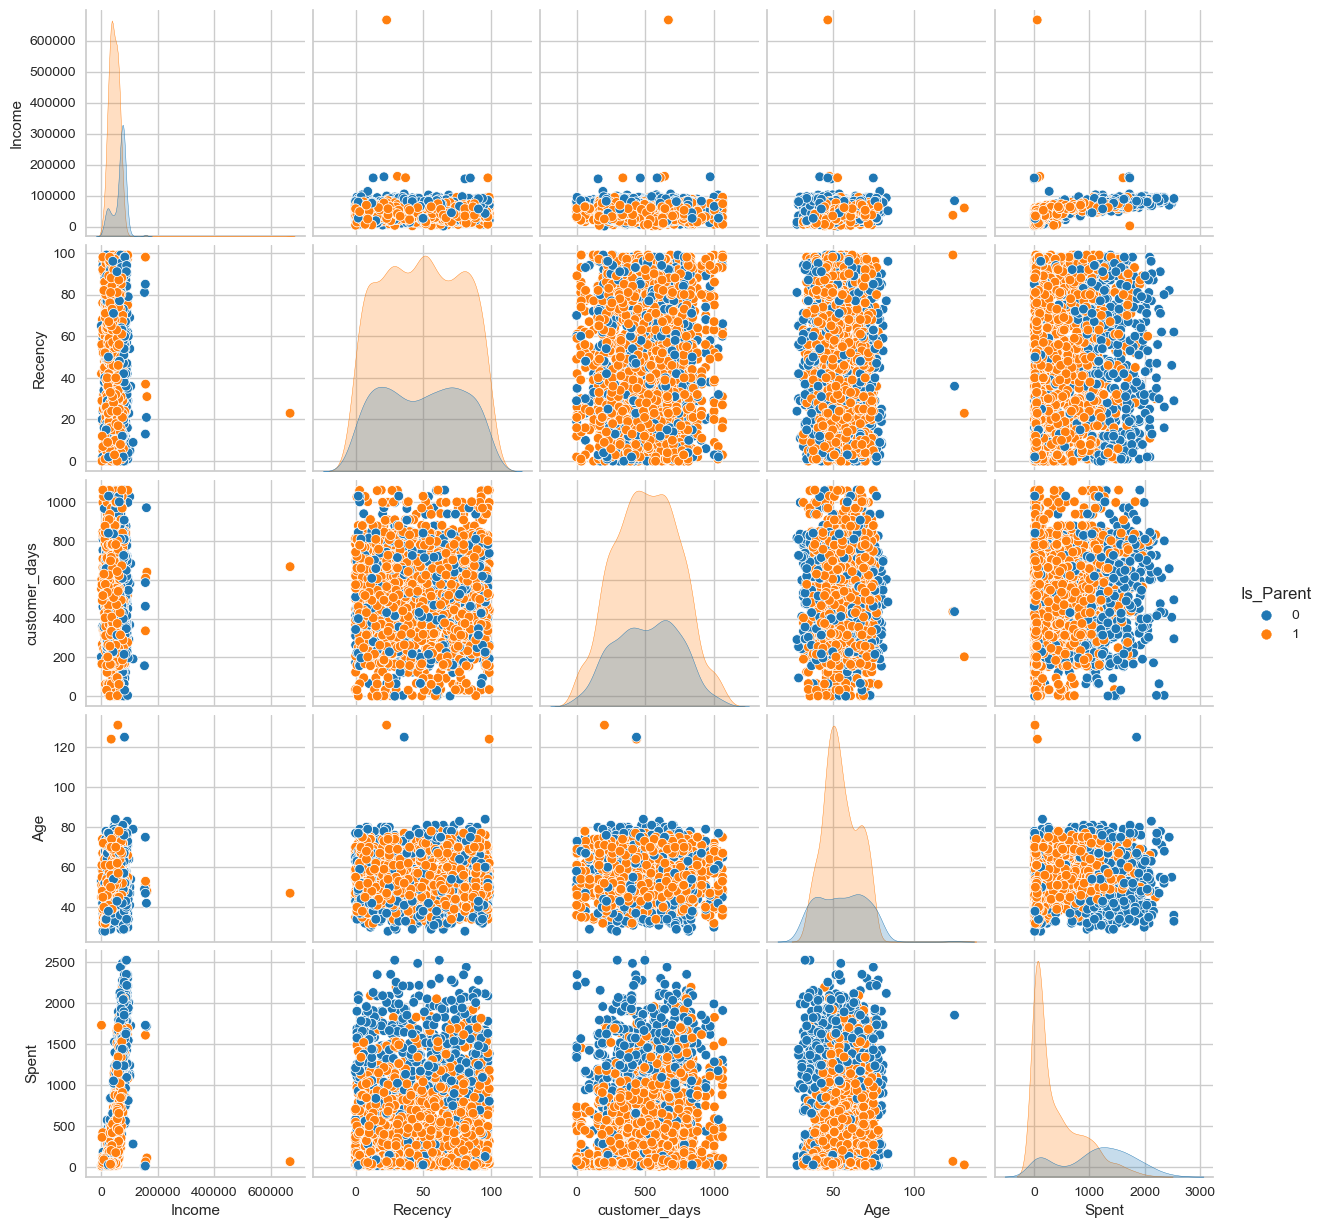

In [34]:
plt.figure()
sns.pairplot(df[["Income", "Recency", "customer_days","Age", "Spent", "Is_Parent"]], hue= "Is_Parent",palette= (["#1f77b4","#ff7f0e"]))

* Removing the outliers

In [35]:
df = df[df['Age']<90]

In [36]:
df = df[df['Income']<600000]

In [37]:
len(df)

2212

<AxesSubplot:>

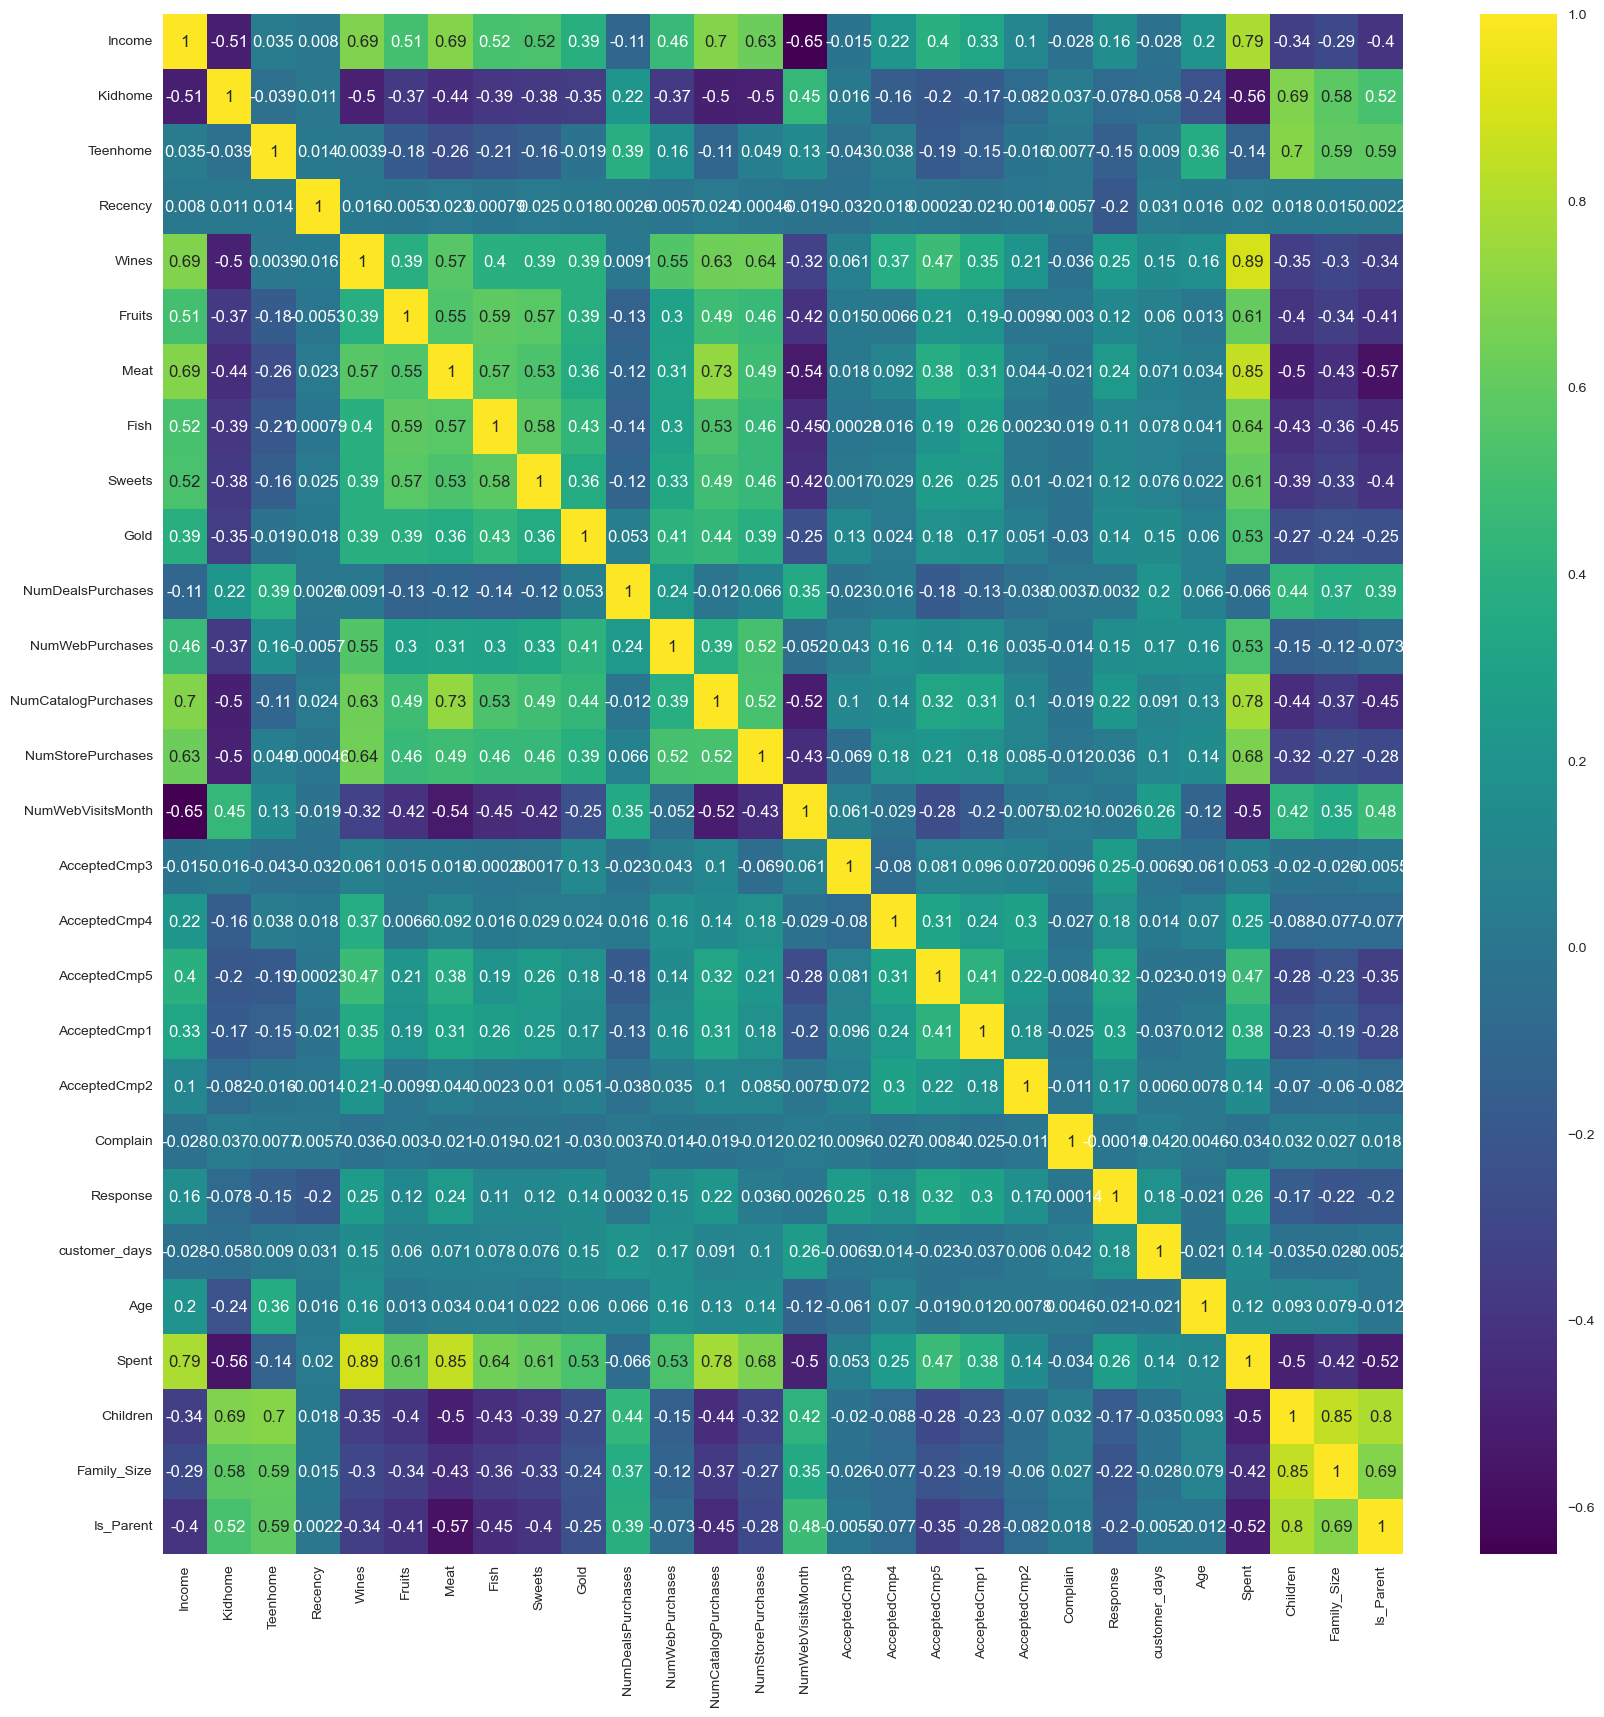

In [38]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### Encoding
* Using label encoder we are encoding the categorical cilumns into numerical values

In [39]:
ct = (df.dtypes == 'object')

In [40]:
type(ct)

pandas.core.series.Series

In [41]:
cts = list(ct[ct == True].index)


In [42]:
cts

['Education', 'Living_with']

In [43]:
LE=LabelEncoder()
for i in cts:
    df[i]=df[[i]].apply(LE.fit_transform)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [45]:
df1= df

* Removing the columns which we are not going to use for our clustering model

In [46]:
df1.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1)

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0      172      88  ...                   10                  4   
1        2       1  ...                    1                  2   
2      111      21  ...                    2                 10   
3       10       3  ...                    0                  4   
4       46      27  ...                    3                  6   
...    ...     ...  ...                  ...                ...   
2235    42     118  ...                    3                  4   
2236     0       0  ...                    2                  5   
2237    32      12  ...                    3                 13   
2238    80      30  ...                    5                 10   
2239     2       1  ...                    1                  4   

      NumWebVisitsMonth  customer_days  Age  Spent  Living_with  Children  \
0                     7            971   67   1617            0         0   
1                     5            125   70     27            0         2   
2                     4            472   59    776            1         0   
3                     6             65   40     53            1         1   
4                     5            321   43    422            1         1   
...                 ...            ...  ...    ...          ...       ...   
2235                  5            541   57   1341            1         1   
2236                  7             61   78    444            1         3   
2237                  6            315   43   1241            0         0   
2238                  3            316   68    843            1         1   
2239                  7            782   70    172            1         2   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
2235            3          1  
2236            5          1  
2237            1          0  
2238            3          1  
2239            4          1  

[2212 rows x 23 columns]

### Standartization

In [47]:
scaler = StandardScaler()
scaler.fit(df1)
df2 = pd.DataFrame(scaler.transform(df1),columns= df1.columns )

In [48]:
df2.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  AcceptedCmp2  Complain  Response  \
0  1.690293  2.453472  1.483713  ...     -0.117256  -0.09552  2.375425   
1 -0.718230 -0.651004 -0.634019  ...     -0.117256  -0.09552 -0.420977   
2 -0.178542  1.339513 -0.147184  ...     -0.117256  -0.09552 -0.420977   
3 -0.655787 -0.504911 -0.585335  ...     -0.117256  -0.09552 -0.420977   
4 -0.218684  0.152508 -0.001133  ...     -0.117256  -0.09552 -0.420977   

   customer_days       Age     Spent  Living_with  Children  Family_Size  \
0       1.973583  1.018352  1.676245    -1.349603 -1.264598    -1.758359   
1      -1.665144  1.274785 -0.963297    -1.349603  1.404572     0.449070   
2      -0.172664  0.334530  0.280110     0.740959 -1.264598    -0.654644   
3      -1.923210 -1.289547 -0.920135     0.740959  0.069987     0.449070   
4      -0.822130 -1.033114 -0.307562     0.740959  0.069987     0.449070   

   Is_Parent  
0  -1.581139  
1   0.632456  
2  -1.581139  
3   0.632456  
4   0.632456  

[5 rows x 30 columns]

## Dimensionality Reduction

* We need to reduce the dimensions of our model as we are going to use agglomerative clustering . Distances in high dimensional data is not much reliable

* We are converting our data set into 3 dimensions using PCA - Principal Component Analysis

In [49]:
pca = PCA(n_components=3)
pca.fit(df2)
df_pca = pd.DataFrame(pca.transform(df2), columns=(["col1","col2", "col3"]))

In [50]:
df_pca.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -8.331692e-17  2.960331 -5.915181 -2.563594 -0.862895  2.273855   
col2  2212.0 -3.081722e-17  1.714620 -4.276201 -1.348031 -0.178828  1.271931   
col3  2212.0 -5.139550e-17  1.387625 -3.191239 -0.781123 -0.161666  0.363564   

           max  
col1  8.538451  
col2  6.027010  
col3  8.308544

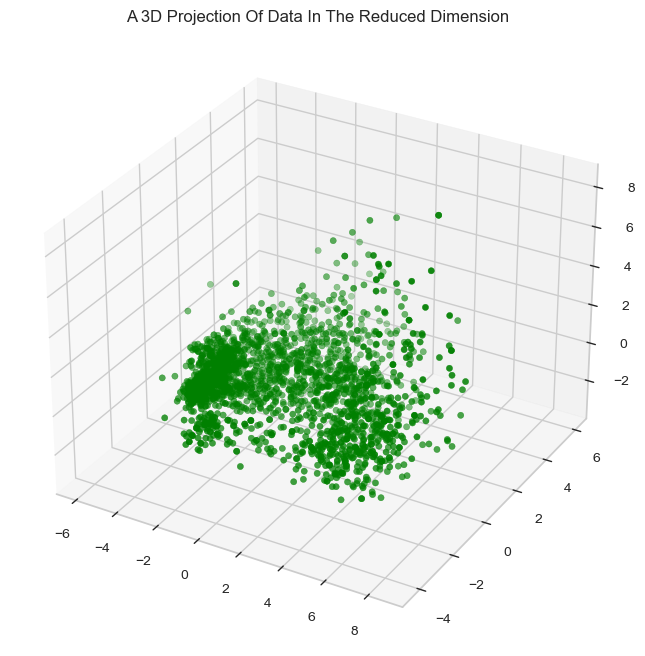

In [51]:
x =df_pca["col1"]
y =df_pca["col2"]
z =df_pca["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

### Elbow Visualizer 

* We are using the  Elbow visualizer to find the appropiate number of clusters which we should use for our model

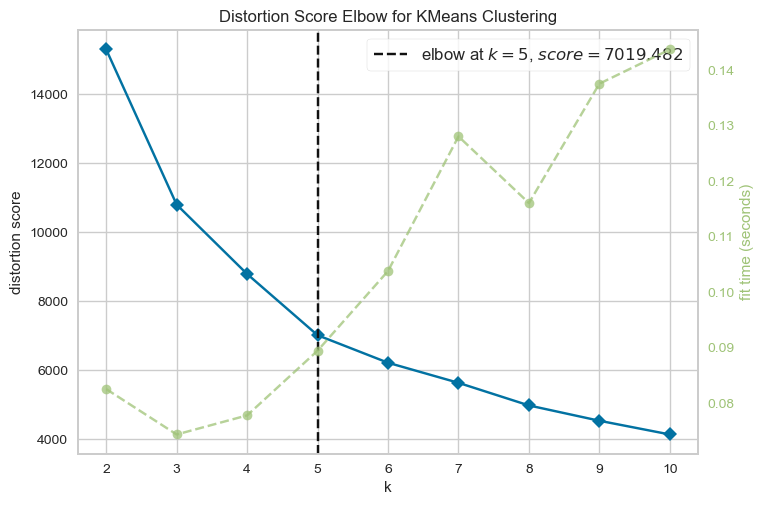

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

### Agglomerative Clustering
 
 * We are using Agglomerative clustering 
 
 
 * Agglomerative clustering is a type of hierarchical clustering method, which is a popular technique in unsupervised machine learning for grouping similar data points into clusters. Unlike partition-based clustering methods like K-Means, hierarchical clustering builds a hierarchy of clusters, typically visualized as a tree-like structure called a dendrogram.

* Agglomerative clustering follows a bottom-up approach, where each data point starts as its own cluster. The algorithm then repeatedly merges the closest pairs of clusters until all points are grouped into a single cluster or until a predefined number of clusters is reached.

In [53]:
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(df_pca)
df_pca["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

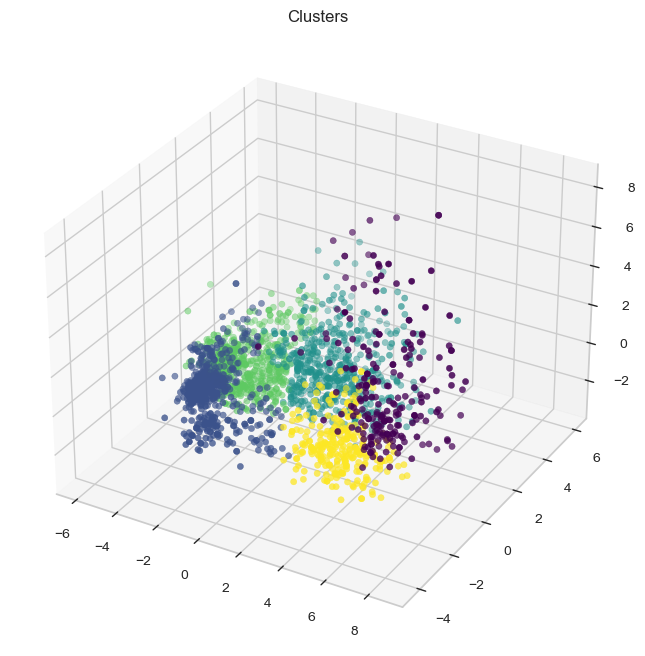

In [54]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=df['Clusters'],cmap='viridis', marker="o" )
ax.set_title("Clusters")
plt.show()

Text(0.5, 1.0, 'Distribution of Clusters')

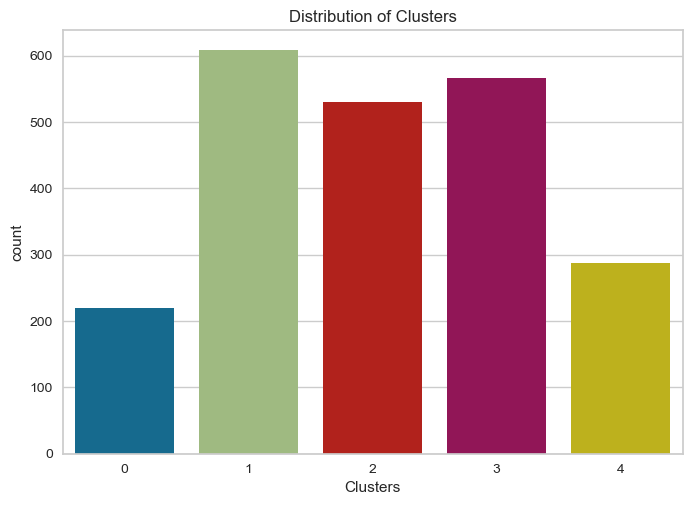

In [55]:
pl=sns.countplot(df['Clusters'])
pl.set_title('Distribution of Clusters')

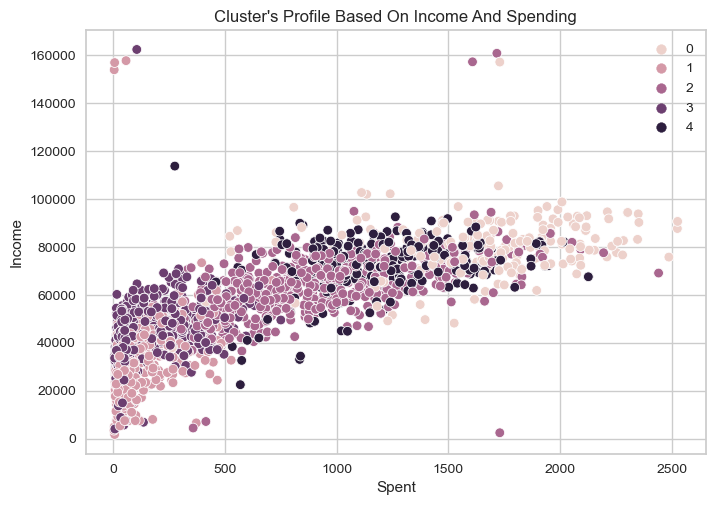

In [56]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

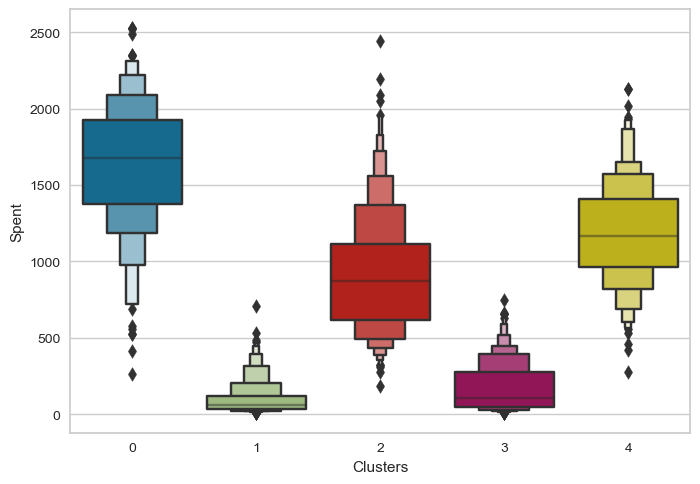

In [57]:

pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

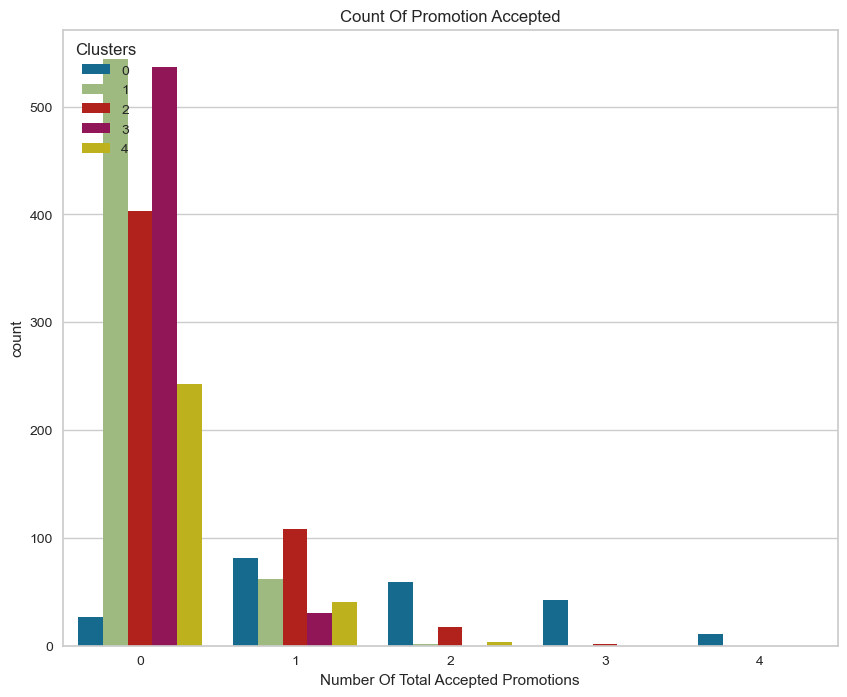

In [58]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

plt.figure(figsize=(10,8))
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<Figure size 800x550 with 0 Axes>

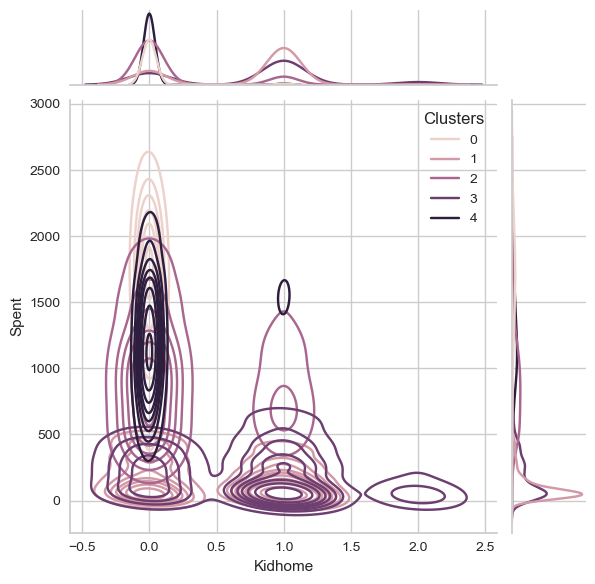

<Figure size 800x550 with 0 Axes>

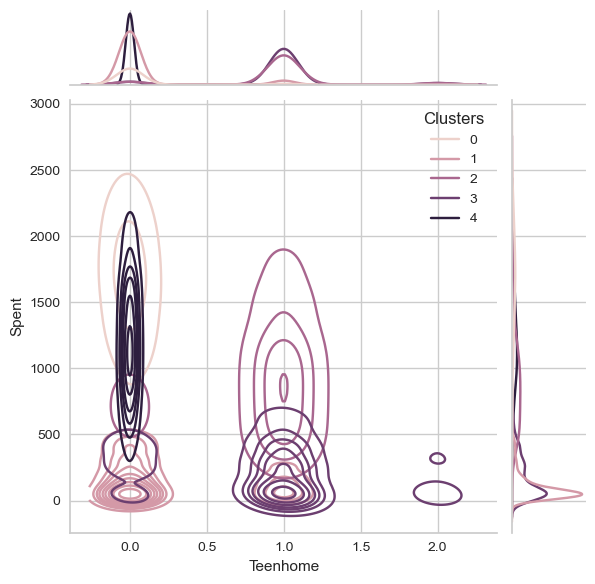

<Figure size 800x550 with 0 Axes>

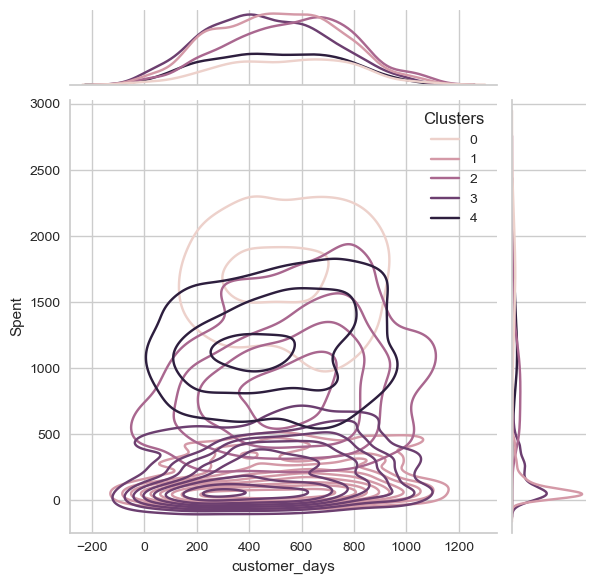

<Figure size 800x550 with 0 Axes>

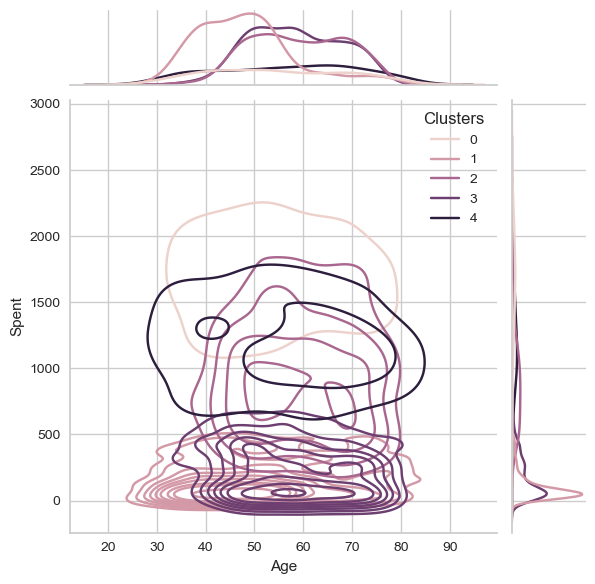

<Figure size 800x550 with 0 Axes>

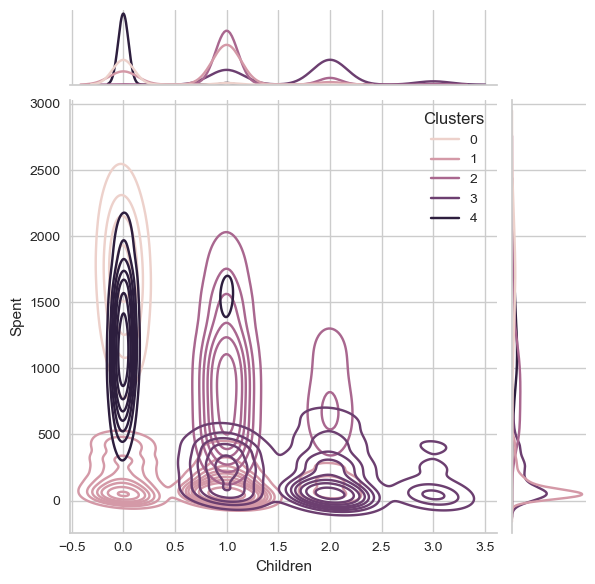

<Figure size 800x550 with 0 Axes>

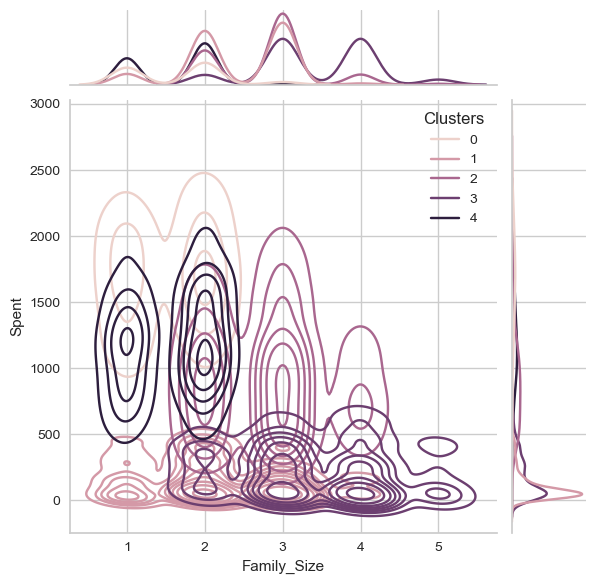

<Figure size 800x550 with 0 Axes>

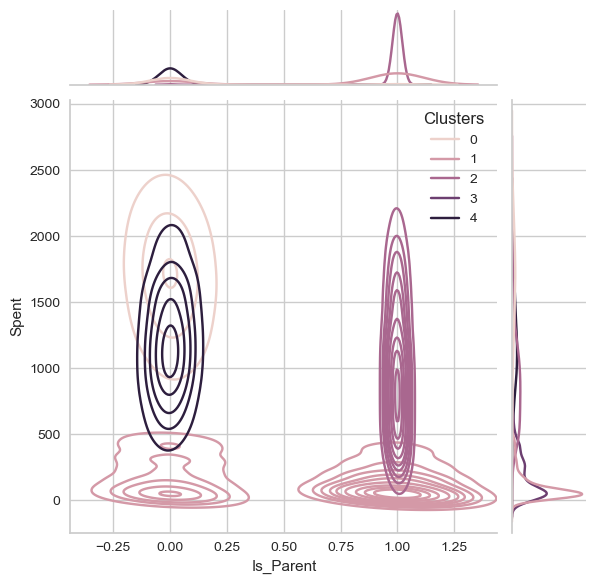

<Figure size 800x550 with 0 Axes>

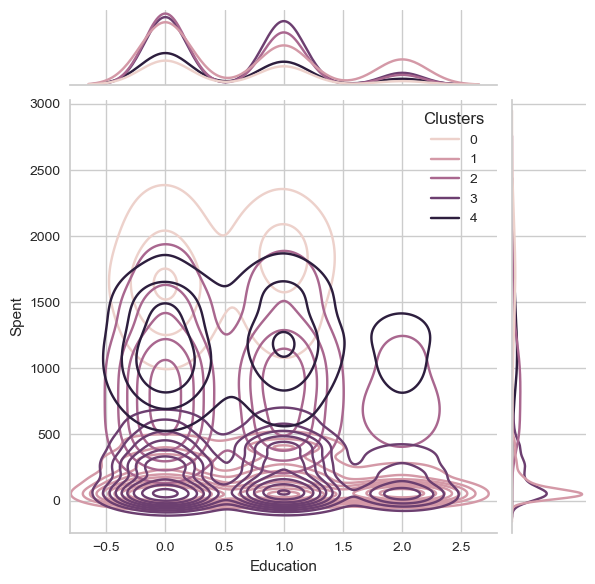

<Figure size 800x550 with 0 Axes>

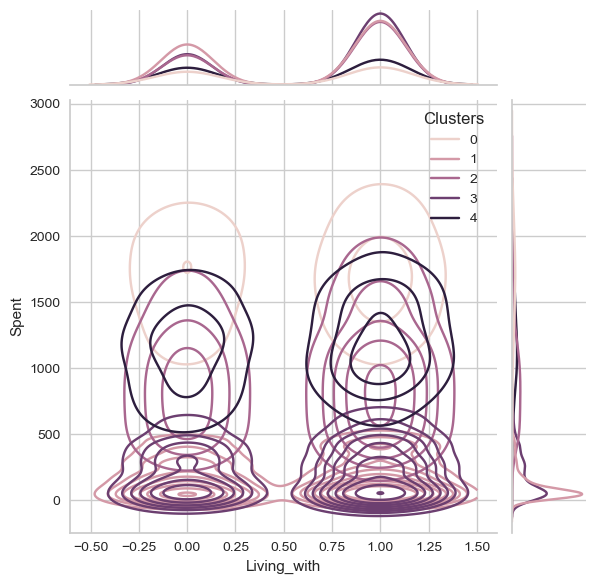

In [59]:
Personal = [ "Kidhome","Teenhome","customer_days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_with"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde")
    plt.show()

## Conclusions 

#### Using these various visualizations we can arrive at a conclusion based on the nature of clusters


* Cluster 0 : They spend very low as well as their income is also low
* Cluster 1 : They are mostly a parent and have one children
* Cluster 2 : They are mostly single and they are in the high spending category
* Cluster 3 : They are also mostly parents and they spend low
* Cluster 4 : They spend at a moderate level with a moderate income and they are mostly single